In [1]:
import sys
sys.path.append('../')

from slurp_data import SLURPDataset
import torch
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

from transformers import SpeechT5Processor, SpeechT5ForSpeechToText, SpeechT5ForTextToSpeech, SpeechT5HifiGan, set_seed

from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sentence_transformers import SentenceTransformer, util

from sklearn.cluster import KMeans

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
data_path = "../slurp"

train_set = SLURPDataset(data_path, mode="test", task="intent")
#test_set = SLURPDataset(data_path, mode="test", task="intent")

#print(f"Training set size: {len(train_set)} and Test set size: {len(test_set)}")

In [5]:
CLASSES = train_set.intents

In [5]:
CLASSES

['query',
 'iot_coffee',
 'general_quirky',
 'lists_query',
 'hue_lightoff',
 'iot_wemo_on',
 'email_addcontact',
 'iot_wemo_off',
 'iot_cleaning',
 'calendar_set',
 'news_query',
 'cooking_recipe',
 'play_podcasts',
 'cleaning',
 'iot_hue_lightchange',
 'radio',
 'sendemail',
 'transport_traffic',
 'post',
 'calendar_remove',
 'qa_maths',
 'music_query',
 'set',
 'play_audiobook',
 'social_query',
 'audio_volume_other',
 'general_joke',
 'qa_stock',
 'alarm_remove',
 'music_likeness',
 'general_greet',
 'email_querycontact',
 'weather_query',
 'recommendation_movies',
 'qa_factoid',
 'hue_lightup',
 'datetime_convert',
 'music_dislikeness',
 'play_radio',
 'alarm_set',
 'takeaway_query',
 'lists_remove',
 'iot_hue_lightdim',
 'transport_ticket',
 'transport_query',
 'audio_volume_mute',
 'qa_currency',
 'audio_volume_down',
 'game',
 'wemo_off',
 'createoradd',
 'play_game',
 'iot_hue_lightoff',
 'qa_definition',
 'lists_createoradd',
 'music',
 'podcasts',
 'remove',
 'takeaway_order

In [6]:
processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_asr")

In [7]:
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(CLASSES)

In [8]:
numerical_labels

array([58, 27, 22, 37, 24, 34, 15, 33, 26,  9, 45, 11, 49, 10, 28, 60, 65,
       74, 52,  8, 56, 43, 66, 46, 68,  5, 21, 57,  1, 42, 20, 17, 75, 63,
       55, 25, 13, 41, 50,  2, 70, 38, 29, 73, 71,  4, 53,  3, 19, 76, 12,
       47, 30, 54, 36, 40, 51, 64, 69,  7, 39, 31, 32,  6, 44, 59, 35, 18,
       72, 61,  0, 23, 14, 16, 48, 62, 67])

In [9]:
label_binarizer = LabelBinarizer()
onehot_labels = label_binarizer.fit_transform(numerical_labels)

In [10]:
onehot_labels[0] #75 (from 0 to 76)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
onehot_labels[1] #2 (from 0 to 76)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
label_encoder.classes_

array(['alarm_query', 'alarm_remove', 'alarm_set', 'audio_volume_down',
       'audio_volume_mute', 'audio_volume_other', 'audio_volume_up',
       'calendar_query', 'calendar_remove', 'calendar_set', 'cleaning',
       'cooking_recipe', 'createoradd', 'datetime_convert',
       'datetime_query', 'email_addcontact', 'email_query',
       'email_querycontact', 'email_sendemail', 'game', 'general_greet',
       'general_joke', 'general_quirky', 'hue_lightdim', 'hue_lightoff',
       'hue_lightup', 'iot_cleaning', 'iot_coffee', 'iot_hue_lightchange',
       'iot_hue_lightdim', 'iot_hue_lightoff', 'iot_hue_lighton',
       'iot_hue_lightup', 'iot_wemo_off', 'iot_wemo_on', 'joke',
       'lists_createoradd', 'lists_query', 'lists_remove', 'locations',
       'music', 'music_dislikeness', 'music_likeness', 'music_query',
       'music_settings', 'news_query', 'play_audiobook', 'play_game',
       'play_music', 'play_podcasts', 'play_radio', 'podcasts', 'post',
       'qa_currency', 'qa_defin

In [13]:
label_binarizer.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76])

In [14]:
#numerical_labels = label_binarizer.inverse_transform(onehot_labels)
#original_labels = label_encoder.inverse_transform(numerical_labels)

In [15]:
def collate_fn(batch):
    slurp_ids, texts, audios, sample_rates, tasks = zip(*batch)
    
    input_texts = processor(text=texts, return_tensors='pt', padding="longest").to(device)
    processor.feature_extractor.sampling_rate = 22050
    input_audios = processor(audio=audios, sampling_rate=sample_rates[0], return_tensors="pt", padding="longest").to(device)
    
    #turn to one encoding
    #print(tasks)
    targets = label_encoder.transform(tasks)
    #print(targets)
    targets = label_binarizer.transform(targets)
    #print(targets)
    
    return slurp_ids, input_texts, input_audios, sample_rates, targets

In [16]:
batch_size = 16

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
#test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

In [17]:
for data in train_loader:
    _, texts, audios, _, targets = data
    break

## Model Audio

In [18]:
model_stt = SpeechT5ForSpeechToText.from_pretrained("microsoft/speecht5_asr")

In [19]:
model_stt = model_stt.to(device)

In [20]:
predicted_ids_speech = model_stt.generate(**audios)

/export/home/lium/bdos/miniconda3/envs/transf/lib/python3.9/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (450) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [21]:
out_stt = model_stt(**audios, decoder_input_ids=predicted_ids_speech)

In [22]:
speech_embeddings = out_stt.encoder_last_hidden_state

In [23]:
speech_embeddings.shape

torch.Size([16, 281, 768])

## Model Text

In [24]:
model_tts = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

In [25]:
model_tts = model_tts.to(device)

In [26]:
n = texts['input_ids'].shape[0]
speaker_embeddings = torch.zeros((n, 512)).to(device)
set_seed(555)

In [27]:
decoder_input_values = torch.zeros((n, 1024, 80)).to(device) #(batch_size, sequence_length, num_mel_bins)

In [28]:
out_tts = model_tts(**texts, speaker_embeddings=speaker_embeddings, decoder_input_values=decoder_input_values)

In [29]:
text_embeddings = out_tts.encoder_last_hidden_state

In [30]:
text_embeddings.shape

torch.Size([16, 63, 768])

In [31]:
!nvidia-smi

Tue Jul 18 16:29:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     On   | 00000000:3B:00.0 Off |                    0 |
| N/A   30C    P0   263W / 250W |  24582MiB / 45556MiB |     81%   E. Process |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Embedding operations

In [32]:
speech_embeddings_avg = torch.mean(speech_embeddings, dim=1, keepdim=True)
text_embeddings_avg = torch.mean(text_embeddings, dim=1, keepdim=True)

print(speech_embeddings_avg.shape, text_embeddings_avg.shape)

torch.Size([16, 1, 768]) torch.Size([16, 1, 768])


In [33]:
speech_embeddings_avg_vis = speech_embeddings_avg.squeeze(1)
text_embeddings_avg_vis = text_embeddings_avg.squeeze(1)

print(speech_embeddings_avg_vis.shape, text_embeddings_avg_vis.shape)

torch.Size([16, 768]) torch.Size([16, 768])


In [34]:
all_embeddings_avg = torch.cat((speech_embeddings_avg_vis, text_embeddings_avg_vis), dim=0)
all_embeddings_avg.shape

torch.Size([32, 768])

In [35]:
pca = PCA(n_components=3)
pca_avg = pca.fit_transform(all_embeddings_avg.cpu().detach().numpy())

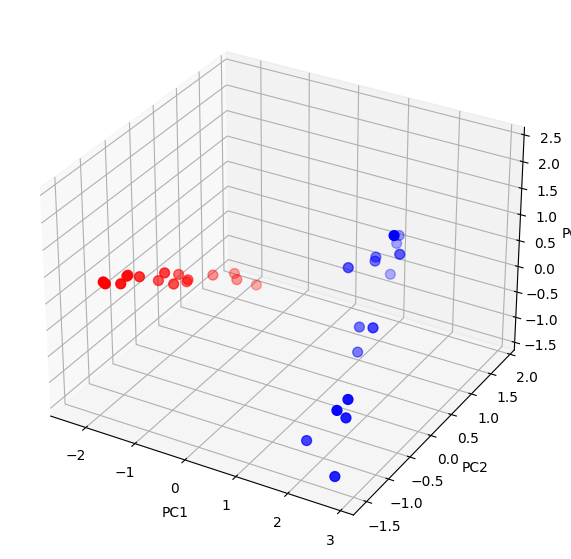

In [36]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

# Adding points on the 3D plot
ax.scatter3D(pca_avg[:16,0], pca_avg[:16,1], pca_avg[:16,2], s=50, c='b') # Speech points
ax.scatter3D(pca_avg[16:,0], pca_avg[16:,1], pca_avg[16:,2], s=50, c='r') # Text points

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [38]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [39]:
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

In [40]:
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

In [42]:
embeddings1.shape, embeddings2.shape

(torch.Size([3, 384]), torch.Size([3, 384]))

In [43]:
cosine_scores = util.cos_sim(embeddings1, embeddings2)

In [44]:
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

The cat sits outside 		 The dog plays in the garden 		 Score: 0.2838
A man is playing guitar 		 A woman watches TV 		 Score: -0.0327
The new movie is awesome 		 The new movie is so great 		 Score: 0.8939


In [45]:
sentences = ['The cat sits outside',
             'A man is playing guitar',
             'I love pasta',
             'The new movie is awesome',
             'The cat plays in the garden',
             'A woman watches TV',
             'The new movie is so great',
             'Do you like pizza?']

In [46]:
embeddings = model.encode(sentences, convert_to_tensor=True)

In [47]:
cosine_scores = util.cos_sim(embeddings, embeddings)

In [48]:
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

In [49]:
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

In [50]:
for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))

The new movie is awesome 		 The new movie is so great 		 Score: 0.8939
The cat sits outside 		 The cat plays in the garden 		 Score: 0.6788
I love pasta 		 Do you like pizza? 		 Score: 0.5096
I love pasta 		 The new movie is so great 		 Score: 0.2560
I love pasta 		 The new movie is awesome 		 Score: 0.2440
A man is playing guitar 		 The cat plays in the garden 		 Score: 0.2105
The new movie is awesome 		 Do you like pizza? 		 Score: 0.1969
The new movie is so great 		 Do you like pizza? 		 Score: 0.1692
The cat sits outside 		 A woman watches TV 		 Score: 0.1310
The cat plays in the garden 		 Do you like pizza? 		 Score: 0.0900


In [53]:
sentences = ['A'+str(i+1) if i < 16 else 'T'+str(i-16+1) for i in range(32)]
sentences

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'T15',
 'T16']

In [54]:
all_embeddings_avg.shape

torch.Size([32, 768])

In [55]:
cosine_scores = util.cos_sim(all_embeddings_avg, all_embeddings_avg)

In [56]:
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

In [57]:
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

In [67]:
for pair in pairs:
    i, j = pair['index']
    if sentences[i][1:] == sentences[j][1:]:
        print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))

A9 		 T9 		 Score: 0.1342
A4 		 T4 		 Score: 0.1221
A3 		 T3 		 Score: 0.1176
A5 		 T5 		 Score: 0.0992
A2 		 T2 		 Score: 0.0989
A6 		 T6 		 Score: 0.0987
A13 		 T13 		 Score: 0.0966
A15 		 T15 		 Score: 0.0848
A10 		 T10 		 Score: 0.0735
A14 		 T14 		 Score: 0.0723
A12 		 T12 		 Score: 0.0613
A16 		 T16 		 Score: 0.0488
A11 		 T11 		 Score: 0.0338
A8 		 T8 		 Score: 0.0300
A1 		 T1 		 Score: 0.0268
A7 		 T7 		 Score: 0.0029


In [76]:
# Perform kmean clustering
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(all_embeddings_avg.cpu().detach().numpy())
cluster_assignment = clustering_model.labels_

/export/home/lium/bdos/miniconda3/envs/transf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [77]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(all_embeddings_avg[sentence_id])

In [78]:
for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
[tensor([-7.0808e-02, -1.1390e-01,  1.7791e-02, -1.6176e-01,  2.5411e-02,
         2.4083e-02, -3.0628e-02, -1.0193e-01,  1.9965e-02, -7.6029e-02,
        -1.3890e-01, -2.2935e-01, -9.2372e-02, -3.5607e-02,  1.5449e-02,
         1.7200e-02,  3.2447e-02, -6.5947e-02, -7.3397e-04,  9.1850e-02,
        -1.0985e-01, -1.9303e-02, -4.1061e-02,  2.9821e-02,  9.4477e-02,
         6.1211e-02, -1.0189e-02, -1.6451e-02,  2.3513e-02, -6.3565e-03,
        -7.4468e-02, -7.7056e-02,  1.3070e-01, -1.1279e-01, -3.9427e-02,
        -8.2177e-02, -1.1914e-01,  2.2255e-02, -5.5046e-02, -1.4717e-01,
        -1.5198e-01, -4.0165e-02,  2.3834e-02, -1.3972e-02, -4.1838e-02,
        -8.5573e-02, -5.7281e-02, -8.5185e-02, -2.5810e-02, -7.1501e-02,
         4.1550e-02, -4.8245e-02, -4.8308e-02,  4.2223e-03,  4.0031e-02,
         4.6515e-02,  1.0507e-01, -5.1229e-02, -1.3229e-01, -6.7298e-02,
        -8.7149e-02, -1.2827e-01,  7.4514e-02,  5.6382e-02,  7.8770e-02,
        -7.1617e-02, -7.3049e-02,  1.31

[tensor([-1.2401e-01, -1.5729e-01,  9.7080e-02, -3.8955e-02, -2.7889e-02,
         5.0990e-02,  4.3816e-02,  4.1585e-03, -5.5208e-02, -1.9950e-02,
         4.2844e-02, -2.9014e-01,  1.2078e-01, -5.3249e-02, -2.3295e-02,
        -3.1836e-02, -3.1833e-02, -8.6184e-02, -1.9882e-01,  9.2586e-02,
         7.3191e-02, -1.0900e-01, -3.1855e-02,  5.0074e-02,  7.0039e-02,
        -6.1128e-02, -9.8969e-02,  1.5319e-01,  2.6272e-02, -9.7226e-02,
        -1.9325e-01,  2.9245e-02, -1.4267e-03, -1.4781e-02,  7.4343e-02,
        -6.0153e-03, -5.8807e-03,  1.0475e-01,  9.4558e-02,  6.9933e-03,
         7.7177e-02, -2.0973e-02, -2.9055e-03, -7.4757e-02,  6.4031e-02,
        -2.7215e-03, -5.9809e-02,  2.9739e-02,  7.7784e-02, -2.8494e-02,
         1.1612e-01, -2.3558e-02,  5.3914e-02, -3.5686e-02,  9.2801e-02,
        -8.4110e-03, -4.0532e-01,  1.5263e-01, -3.0604e-02, -3.9682e-02,
        -1.6211e-03, -2.3483e-02, -4.5468e-02,  1.2116e-02,  5.1245e-02,
        -6.8324e-02,  4.4232e-03,  1.4952e-02,  4.

In [79]:
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(all_embeddings_avg.cpu().detach().numpy())

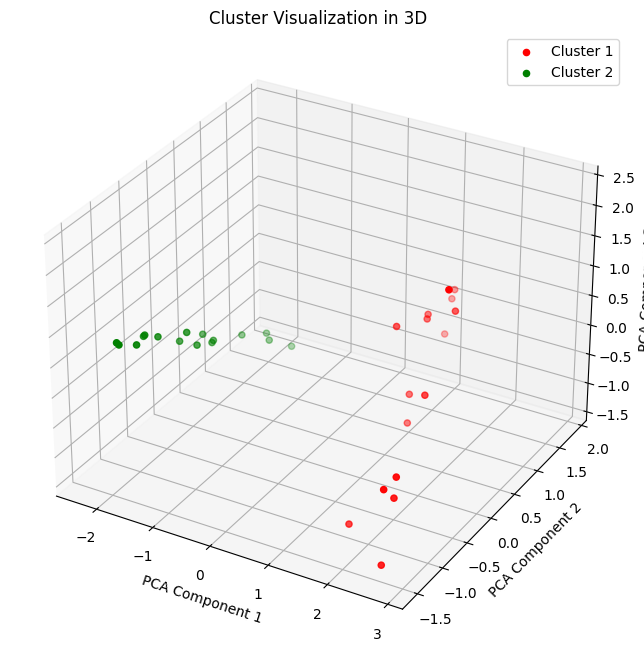

In [80]:
# Create a 3D scatter plot for the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set cluster colors for visualization
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Iterate through clusters and plot the points
for cluster_id, cluster in enumerate(clustered_sentences):
    cluster_points = reduced_embeddings[cluster_assignment == cluster_id]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
               c=colors[cluster_id], label=f"Cluster {cluster_id + 1}")

# Add labels and legend
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Cluster Visualization in 3D')
ax.legend()

# Show the plot
plt.show()